# Problem Set 2, Part Two: Due Tuesday, February 4 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Bonus for Correct Filename

Your submitted version of the notebook should have a filename `ps02_2_lastname.ipynb` where `lastname` should be replaced by your last name, in all lowercase letters.  You'll get a bonus point here if this was done correctly.

### Estimating the Power Curve for a Two-Tailed $t$-test

Consider a sample of size $n=40$ drawn from a normal distribution of
mean $\mu$ and variance $\sigma^2$. A two-tailed $t$ test of
significance $\alpha=.09$ rejects the null hypothesis $H_0$: $\mu=0$ in
favor of the alternative hypothesis $\mu\ne 0$ when
$${\left\lvert\frac{{{\overline{x}}}}{s/\sqrt{n}}\right\rvert} \ge t_{n-1,0.955}$$
Determine the power curve when the sampling distribution is normal
numerically as follows.

**(a)**  Generate $N=10^4$ samples of $n=40$ points each from a standard
    normal distribution $N(0,1)$ as in last week’s problem set, and
    determine the sample mean and sample standard deviation of each
    (which should be stored in $N$-point vectors `xbar_I` and `s_I`).

In [3]:
N = 10**4
n = 40
mu = 0

mydist = stats.norm(loc=mu)

np.random.seed(100)
x_Ii = mydist.rvs(size=(N,n))

xbar_I = x_Ii.mean(axis=-1)
s_I = x_Ii.std(axis=-1,ddof=1)

**(b)** Create a vector of $\mu$ values with

In [4]:
mu_m = np.linspace(-1,1,101)

**(c)**  Explain why we can use a sample drawn from $N(0,1)$ as a “stand-in”
    for sample drawn from $N(\mu,1)$ by making the transformation
    ${{\overline{x}}}\rightarrow{{\overline{x}}}+\mu$ and
    $s\rightarrow s$.  (We sketched out the $\overline{x}$ transformation in lesson 02.1, but be sure to explain the $s$ transformation.) This means we won’t have to re-generate ten
    thousand $40$-point samples for each value of $\mu$; we can just
    adjust the ten thousand ${{\overline{x}}}$ and $s$ values and use those
    to construct the test statistic.

We can use $N(0, 1)$ because when we make the transformation $x \rightarrow x + \mu$, we effectively transport our distribution center from 0 to $\mu$. Since we are only transporting it, our $\sigma$ remains the same. All we have done is more the center of the distribution by adding to each sampled value.

**(d)**  Produce a $101\times 10^4$ array of $t=\frac{{{\overline{x}}}}{s/\sqrt{n}}$ values using vectorization with:

In [5]:
t_mI = (mu_m[:,None] + xbar_I[None,:]) / (s_I[None,:]/np.sqrt(n))

(This command will only work if you've defined `n` and constructed `xbar_I` and `s_I` correctly above.)

**(e)**  For each of the 101 $\mu$ values, find the fraction of $t$ scores
    which lie in the critical region
    ${\left\lvert t\right\rvert}\ge t_{n-1,0.955}$, using a construction like (you'll have to use the appropriate command to define `tcrit` to be $t_{n-1,0.955}$)

In [6]:
a = 0.05
tcrit = stats.t(loc=0,df=(n-1)).ppf((1-a/2))
gamma_m = np.mean(np.abs(t_mI) >= tcrit,axis=-1)

**(f)**  Plot $\gamma(\mu)$ versus $\mu$, and verify that $\gamma(0)=\alpha$.

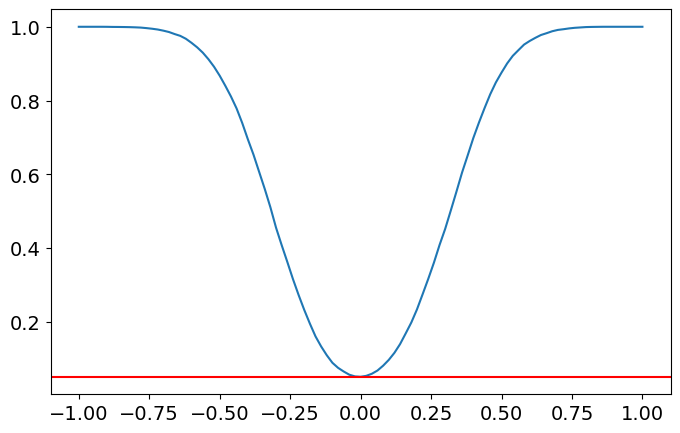

In [7]:
plt.plot(mu_m, gamma_m);
gamma_at_0 = gamma_m[np.abs(mu_m) == np.min(np.abs(mu_m))][0] 
plt.axhline(gamma_at_0, color='red');

In [8]:
print(f"gamma(0) = {gamma_at_0:.3f}, alpha = {a}")

gamma(0) = 0.051, alpha = 0.05


## Confidence Interval for Proportion

Consider the Clopper-Pearson confidence interval for population
proportion, as tabulated in Table A4 of Conover and calculated by

In [9]:
def ClopperPearsonCI(CL,n,x):
    tailprob = 0.5*(1.-CL)
    lower = stats.beta.ppf(tailprob,x,n-x+1)
    upper = stats.beta.isf(tailprob,x+1,n-x)
    lowernan = np.isnan(lower)
    if isinstance(lowernan,np.ndarray):
        lower[lowernan] = 0.
    elif lowernan:
        lower = 0.
    uppernan = np.isnan(upper)
    if isinstance(uppernan,np.ndarray):
        upper[uppernan] = 1.
    elif uppernan:
        upper = 1.
        
    return (lower,upper)

The second half of the function, with all of the `if` statements, is to make sure that the function behaves correctly if one of the ends of the confidence interval is $0$ or $1$. 

**(a)**  Suppose we have a binomial experiment with $n=30$ trials. For what
    values of $x$, the number of successes, does the 90% confidence
    interval contain $p=0.20$?

In [10]:
n = 30
CL = 0.90
p = 0.20

x_values = np.arange(0, n + 1)
valid_x = []

for x in x_values:
    lower, upper = ClopperPearsonCI(CL, n, x)
    if lower <= p <= upper:
        valid_x.append(x)
        
print(valid_x)

[3, 4, 5, 6, 7, 8, 9, 10]


**(b)** Suppose that the true value of $p$ is in fact $0.20$.  What is the total probability that the observed value of $x$ will be one of those listed in part (a)?

In [11]:
total_probability = sum(stats.binom.pmf(x, n, p) for x in valid_x)

print(total_probability)

0.9302047595126764


Compare this actual confidence level to the requested confidence level of 90%.

The actual confidence level $0.93$ is a little greater than our requested confidence level of $0.90$ due to the small sample size. But as we increase n, we approch our requested confidence level. 

**(c)**  Repeat the calculation in parts (a) and (b) for a confidence level of 97% and a true
    proportion of $p=0.35$. (You’ll have to use software for this, since
    these values are not in the tables.)

In [12]:
n = 30
CL = 0.97
p = 0.35

x_values = np.arange(0, n + 1)
valid_x = []

for x in x_values:
    lower, upper = ClopperPearsonCI(CL, n, x)
    if lower <= p <= upper:
        valid_x.append(x)
        
print(valid_x)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [13]:
total_probability = sum(stats.binom.pmf(x, n, p) for x in valid_x)

print(total_probability)

0.9801203843364734
